In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import wbgapi as wb
import matplotlib.patches as patches

In [2]:
url = "https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/HorizontalBarMultipleVars.dta"

data = pd.read_stata(url)
data


,study,facilitycode,case,as_correct,as_h1,as_h2,as_h6,as_h7,as_h8,as_h12,...,kenya_fac_qual_code_2,kenya_fac_qual_code_3,price_kenya,facility_private,checklist_essential,sp_roster_age,sp_roster_bmi,sp_roster_bp,sp_roster_bp_sys,sp_roster_male
0,Kenya,9052302,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,230.0,Private,0.500,31,32.038578,130/80,130,Female
1,Kenya,9012207,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,Private,0.625,31,32.038578,130/80,130,Female
2,Kenya,9052301,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,400.0,Private,0.125,31,32.038578,130/80,130,Female
3,Kenya,9022203,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,250.0,Private,0.125,31,32.038578,130/80,130,Female
4,Kenya,9012206,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,300.0,Private,0.125,31,32.038578,130/80,130,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Kenya,9061301,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,130.0,Public,0.000,31,19.377163,130/80,130,Male
162,Kenya,9041301,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,0.0,Public,0.100,31,19.377163,130/80,130,Male
163,Kenya,9041302,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,200.0,Public,0.000,31,19.377163,130/80,130,Male
164,Kenya,9022302,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1000.0,Private,0.100,31,19.377163,130/80,130,Male


In [3]:
data['refer'] = data['refer'].map({'No': 0, 'Yes': 1})
data[["refer"]] = data[["refer"]].apply(pd.to_numeric)

In [4]:
data['med_class_any_16'] = data['med_class_any_16'].map({'No': 0, 'Steroids': 1})
data[["med_class_any_16"]] = data[["med_class_any_16"]].apply(pd.to_numeric)

In [5]:
data['med_class_any_6'] = data['med_class_any_6'].map({'No': 0, 'Antibiotics': 1})
data[["med_class_any_6"]] = data[["med_class_any_6"]].apply(pd.to_numeric)

In [6]:
data[["med_any"]] = data[["med_any"]].apply(pd.to_numeric)

In [7]:
# Collapse the dataset across each treatment group

data2= (data
       .groupby(['facility_type'])
       .agg({'facility_type':'first','as_correct':'mean','ch_correct': 'mean','cp_correct' : 'mean',
             'tb_correct': 'mean', 'med_any': 'mean',
            'checklist': 'mean', 'refer': 'mean', 
            'med_any':'mean', 'med_class_any_6': 'mean',
            'med_class_any_16': 'mean'}))

data2


,facility_type,as_correct,ch_correct,cp_correct,tb_correct,med_any,checklist,refer,med_class_any_6,med_class_any_16
facility_type,,,,,,,,,,
Public,Public,0.785714,0.615385,0.142857,0.785714,0.654545,0.147986,0.023810,0.472727,0.036364
Private For-Profit,Private For-Profit,0.833333,0.777778,0.111111,0.333333,0.736111,0.285133,0.037037,0.472222,0.000000
Private FBO/SFO,Private FBO/SFO,0.800000,0.777778,0.000000,0.400000,0.743590,0.305415,0.100000,0.564103,0.025641


In [8]:
data2_reset=data2.reset_index(drop=True)
data2_reset


,facility_type,as_correct,ch_correct,cp_correct,tb_correct,med_any,checklist,refer,med_class_any_6,med_class_any_16
0,Public,0.785714,0.615385,0.142857,0.785714,0.654545,0.147986,0.023810,0.472727,0.036364
1,Private For-Profit,0.833333,0.777778,0.111111,0.333333,0.736111,0.285133,0.037037,0.472222,0.000000
2,Private FBO/SFO,0.800000,0.777778,0.000000,0.400000,0.743590,0.305415,0.100000,0.564103,0.025641


In [24]:
# Reshape data

data3 = pd.melt(data2_reset, id_vars=['facility_type'], value_vars=['as_correct', 'ch_correct', 'cp_correct', 'tb_correct','med_any','checklist','refer','med_class_any_6','med_class_any_16'])
data3


,facility_type,variable,value
0,Public,as_correct,0.785714
1,Private For-Profit,as_correct,0.833333
2,Private FBO/SFO,as_correct,0.800000
3,Public,ch_correct,0.615385
4,Private For-Profit,ch_correct,0.777778
5,Private FBO/SFO,ch_correct,0.777778
6,Public,cp_correct,0.142857
7,Private For-Profit,cp_correct,0.111111
8,Private FBO/SFO,cp_correct,0.000000
9,Public,tb_correct,0.785714


In [28]:
data3["variable"] = data3["variable"].astype("category")
data3.variable

0           as_correct
1           as_correct
2           as_correct
3           ch_correct
4           ch_correct
5           ch_correct
6           cp_correct
7           cp_correct
8           cp_correct
9           tb_correct
10          tb_correct
11          tb_correct
12             med_any
13             med_any
14             med_any
15           checklist
16           checklist
17           checklist
18               refer
19               refer
20               refer
21     med_class_any_6
22     med_class_any_6
23     med_class_any_6
24    med_class_any_16
25    med_class_any_16
26    med_class_any_16
Name: variable, dtype: category
Categories (9, object): ['as_correct', 'ch_correct', 'checklist', 'cp_correct', ..., 'med_class_any_16', 'med_class_any_6', 'refer', 'tb_correct']

In [36]:
data3["variable"] = data3["variable"].astype("category")
data3["variable"] = data3["variable"].cat.rename_categories(["Asthma: Inhaler/Bronchodilator",
                                                           "Child Diarrhoea: ORS",
                                                             "Checklist",
                                                           "Chest Pain: Referral/Aspirin/ECG",
                                                             "Any medication",
                                                             "Steroids",
                                                             "Antibiotics",
                                                             "Referred (non-diarrhea)",
                                                           "Tuberculosis: AFB Smear"])
data3.variable

0       Asthma: Inhaler/Bronchodilator
1       Asthma: Inhaler/Bronchodilator
2       Asthma: Inhaler/Bronchodilator
3                 Child Diarrhoea: ORS
4                 Child Diarrhoea: ORS
5                 Child Diarrhoea: ORS
6     Chest Pain: Referral/Aspirin/ECG
7     Chest Pain: Referral/Aspirin/ECG
8     Chest Pain: Referral/Aspirin/ECG
9              Tuberculosis: AFB Smear
10             Tuberculosis: AFB Smear
11             Tuberculosis: AFB Smear
12                      Any medication
13                      Any medication
14                      Any medication
15                           Checklist
16                           Checklist
17                           Checklist
18             Referred (non-diarrhea)
19             Referred (non-diarrhea)
20             Referred (non-diarrhea)
21                         Antibiotics
22                         Antibiotics
23                         Antibiotics
24                            Steroids
25                       

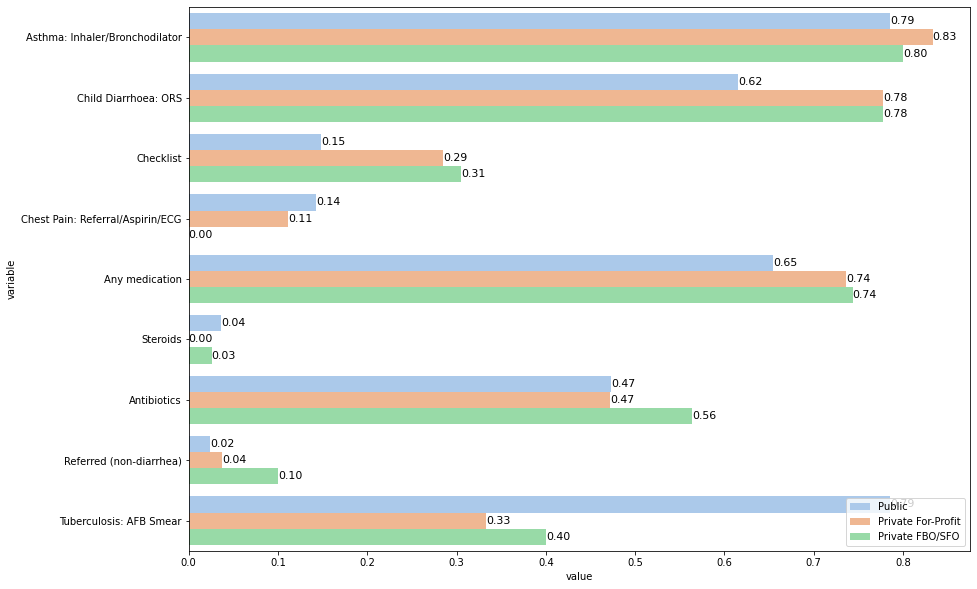

In [52]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data3, x = 'value', y = 'variable', hue = 'facility_type', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11)

plt.legend(loc="lower right")
plt.show()
